In [82]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split

import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

In [83]:
#Importing dataset
main = pd.read_csv('train.csv', index_col='id')
df = main

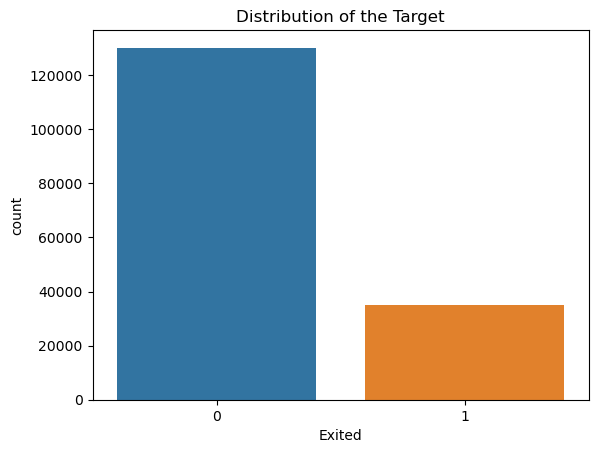

In [154]:
sns.countplot(data=main,x="Exited")
plt.title("Distribution of the Target")
plt.show()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [85]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [86]:
for col in df.columns:
    print(f'Column {col} has {len(df[col].unique())}')

Column CustomerId has 23221
Column Surname has 2797
Column CreditScore has 457
Column Geography has 3
Column Gender has 2
Column Age has 71
Column Tenure has 11
Column Balance has 30075
Column NumOfProducts has 4
Column HasCrCard has 2
Column IsActiveMember has 2
Column EstimatedSalary has 55298
Column Exited has 2


In [87]:
df.duplicated().count()
df.drop_duplicates(inplace=True)

In [88]:
df.shape

(165034, 13)

In [89]:
df=df.drop(columns=['CustomerId','Surname'],axis=1)

In [90]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [91]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [92]:
quants=['CreditScore','Age','Balance','EstimatedSalary']
cats=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
target='Exited'

In [93]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [94]:
#Checking for unique values
for cat in cats:
    print(cat,df[cat].unique())

Geography ['France' 'Spain' 'Germany']
Gender ['Male' 'Female']
Tenure [ 3  1 10  2  5  4  8  6  9  7  0]
NumOfProducts [2 1 3 4]
HasCrCard [1. 0.]
IsActiveMember [0. 1.]


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 15.1+ MB


In [96]:
## Train Test Splitting

In [97]:
X=df.drop(columns='Exited',axis=1)
Y=df['Exited']

In [98]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=100,test_size=0.2)

In [99]:
df = x_train
df['Exited']=y_train

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132027 entries, 37560 to 38408
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      132027 non-null  int64  
 1   Geography        132027 non-null  object 
 2   Gender           132027 non-null  object 
 3   Age              132027 non-null  float64
 4   Tenure           132027 non-null  int64  
 5   Balance          132027 non-null  float64
 6   NumOfProducts    132027 non-null  int64  
 7   HasCrCard        132027 non-null  float64
 8   IsActiveMember   132027 non-null  float64
 9   EstimatedSalary  132027 non-null  float64
 10  Exited           132027 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 12.1+ MB


# Descriptive Analysis

In [101]:
count=0
for i in y_train:
    if i==0:
        count+=1

In [102]:
print(f"Number of customers who haven't exited {count}")
print(f"Number of customers who have exited {len(y_train) - count}")

Number of customers who haven't exited 104079
Number of customers who have exited 27948


c:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


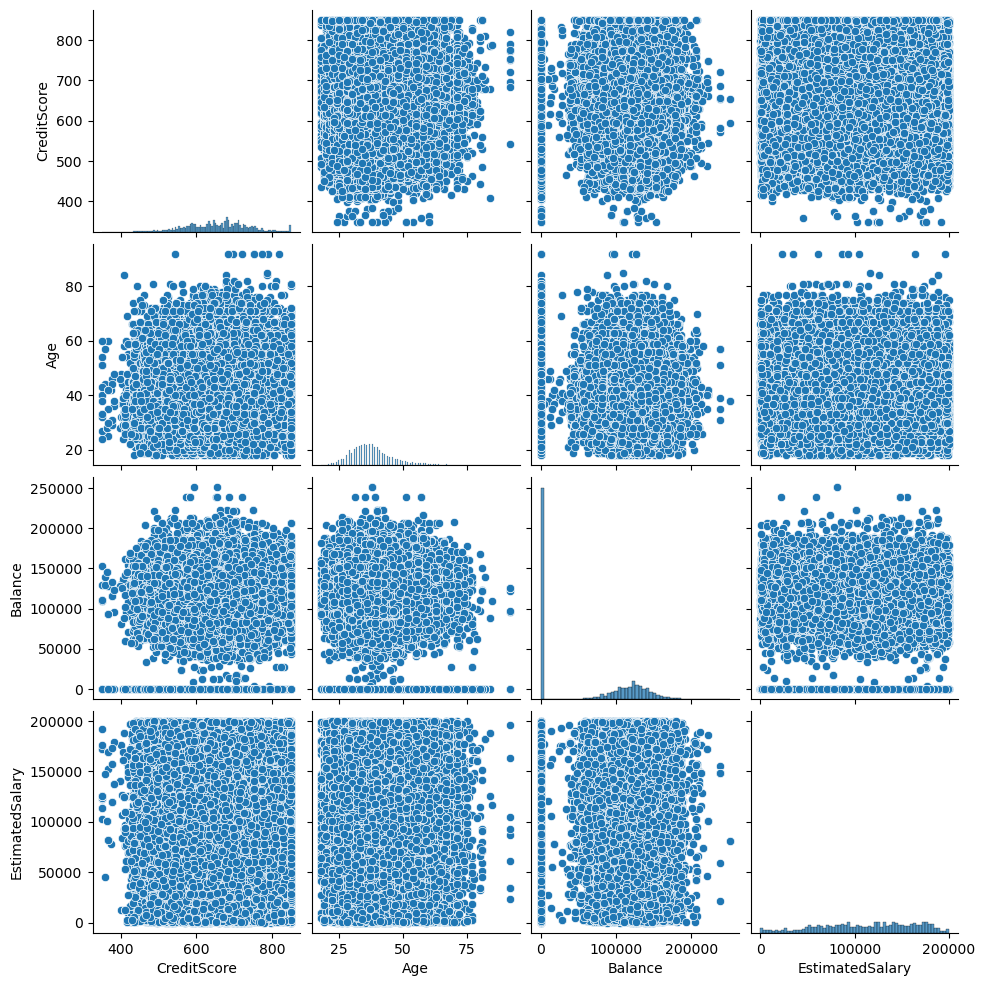

In [103]:
sns.pairplot(df[quants])

<Axes: >

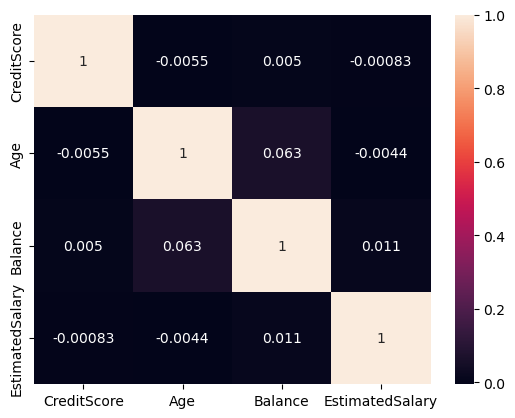

In [104]:
sns.heatmap(df[quants].corr(),annot=True)

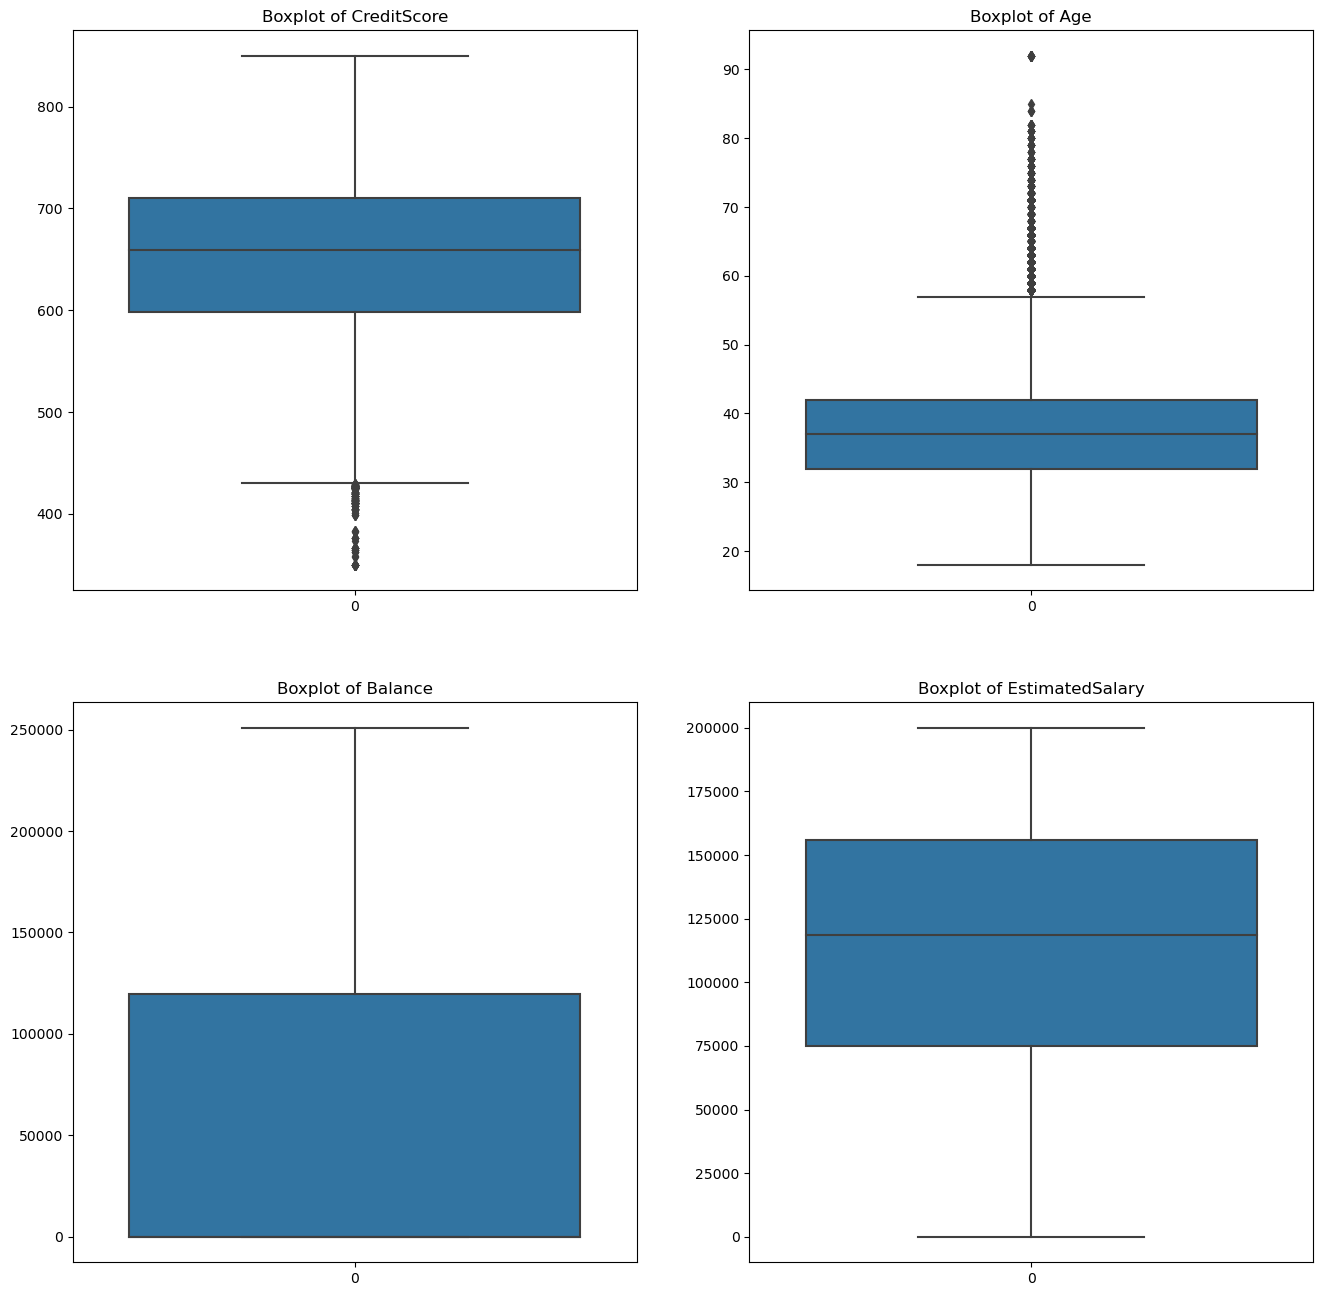

In [105]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,16))

for i,ax in enumerate(axes.ravel()):
    sns.boxplot(df[quants[i]],ax=ax)
    ax.set_title(f"Boxplot of {(quants[i])}")
    
    
plt.show()

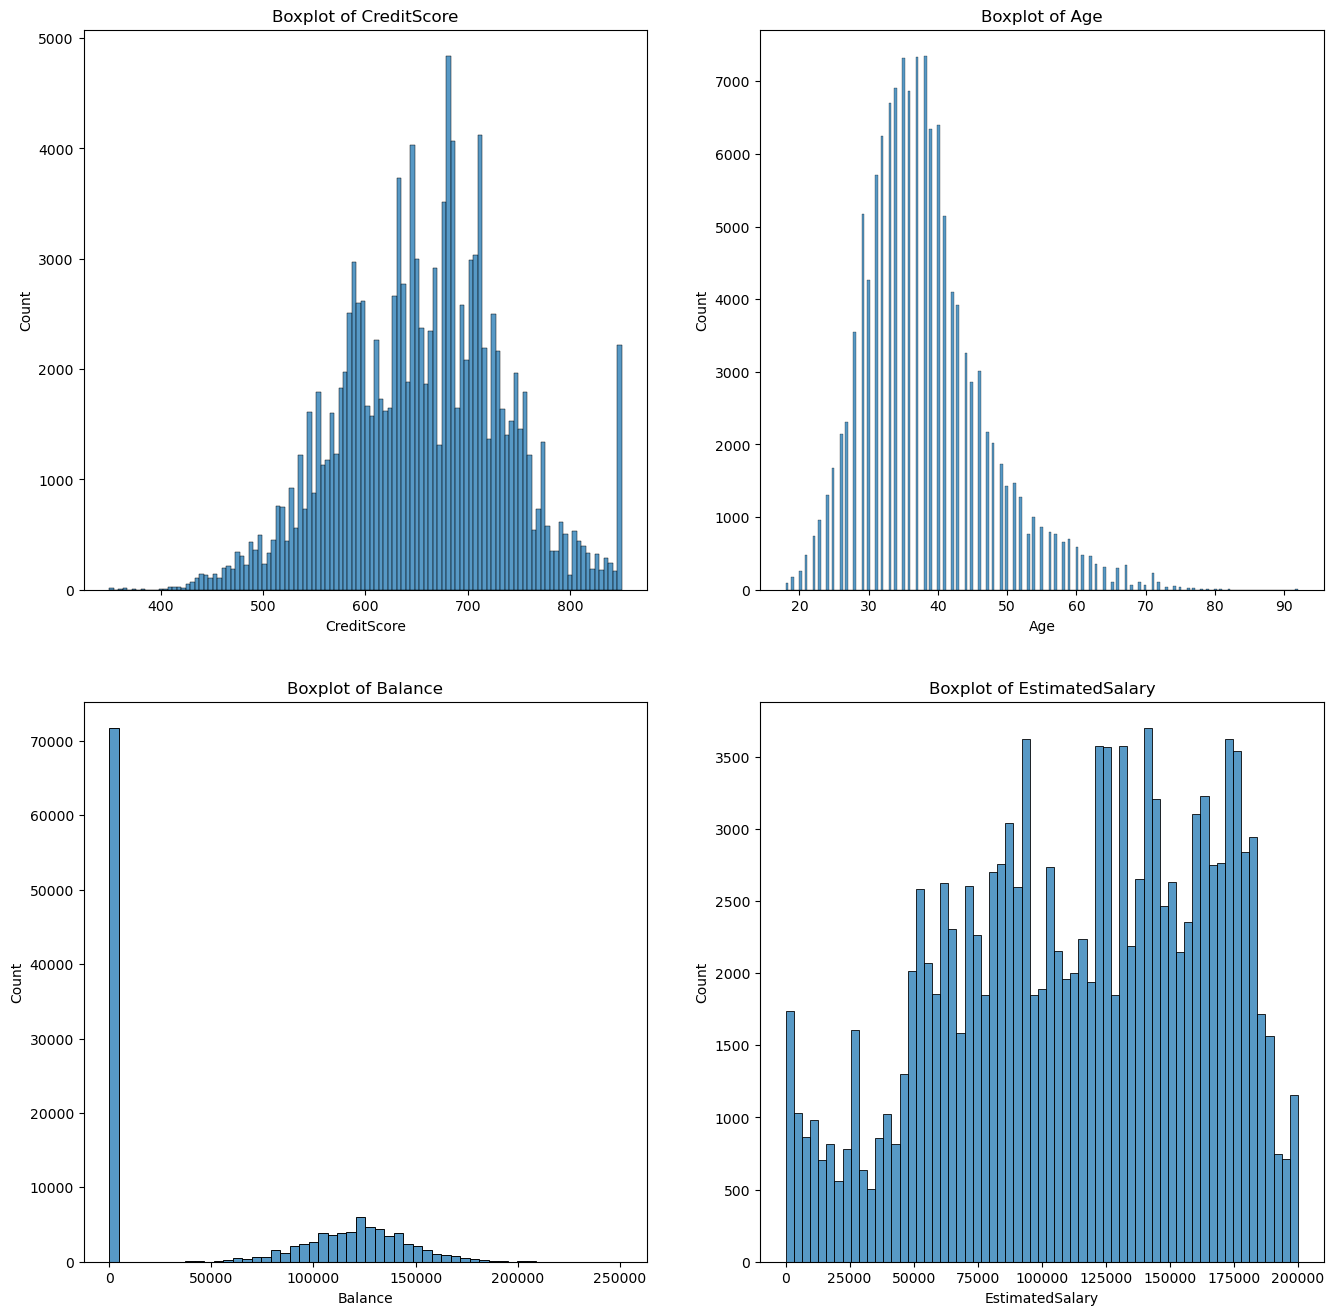

In [106]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,16))

for i,ax in enumerate(axes.ravel()):
    sns.histplot(df[quants[i]],ax=ax)
    ax.set_title(f"Boxplot of {(quants[i])}")
    
    
plt.show()

In [107]:
for cat in cats:
    df[cat]=df[cat].astype('str')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132027 entries, 37560 to 38408
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      132027 non-null  int64  
 1   Geography        132027 non-null  object 
 2   Gender           132027 non-null  object 
 3   Age              132027 non-null  float64
 4   Tenure           132027 non-null  object 
 5   Balance          132027 non-null  float64
 6   NumOfProducts    132027 non-null  object 
 7   HasCrCard        132027 non-null  object 
 8   IsActiveMember   132027 non-null  object 
 9   EstimatedSalary  132027 non-null  float64
 10  Exited           132027 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 16.1+ MB


In [109]:
len(cats)

6

In [110]:
df.shape

(132027, 11)

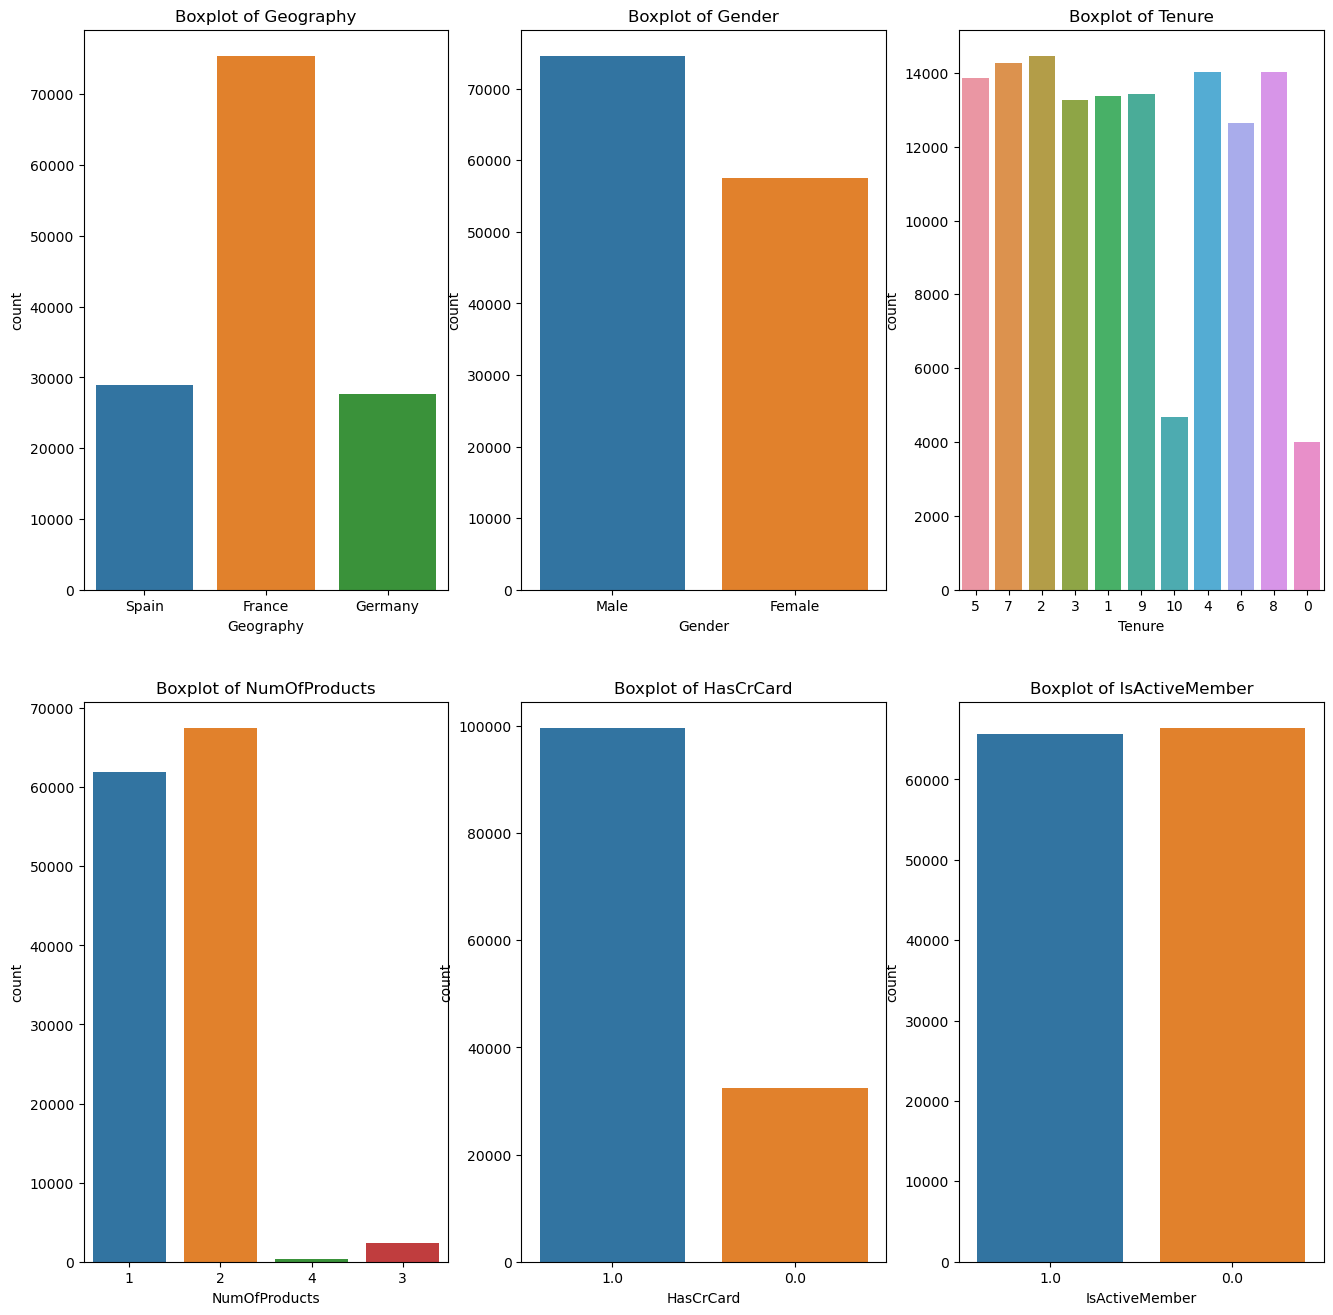

In [111]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,16))

for i,ax in enumerate(axes.ravel()):
    sns.countplot(x=cats[i],data=df,ax=ax)
    ax.set_title(f"Boxplot of {(cats[i])}")
    
    
plt.show()

## Bivariate Anlysis Between target and the other variables

In [112]:
df.Exited=df.Exited.astype(str)

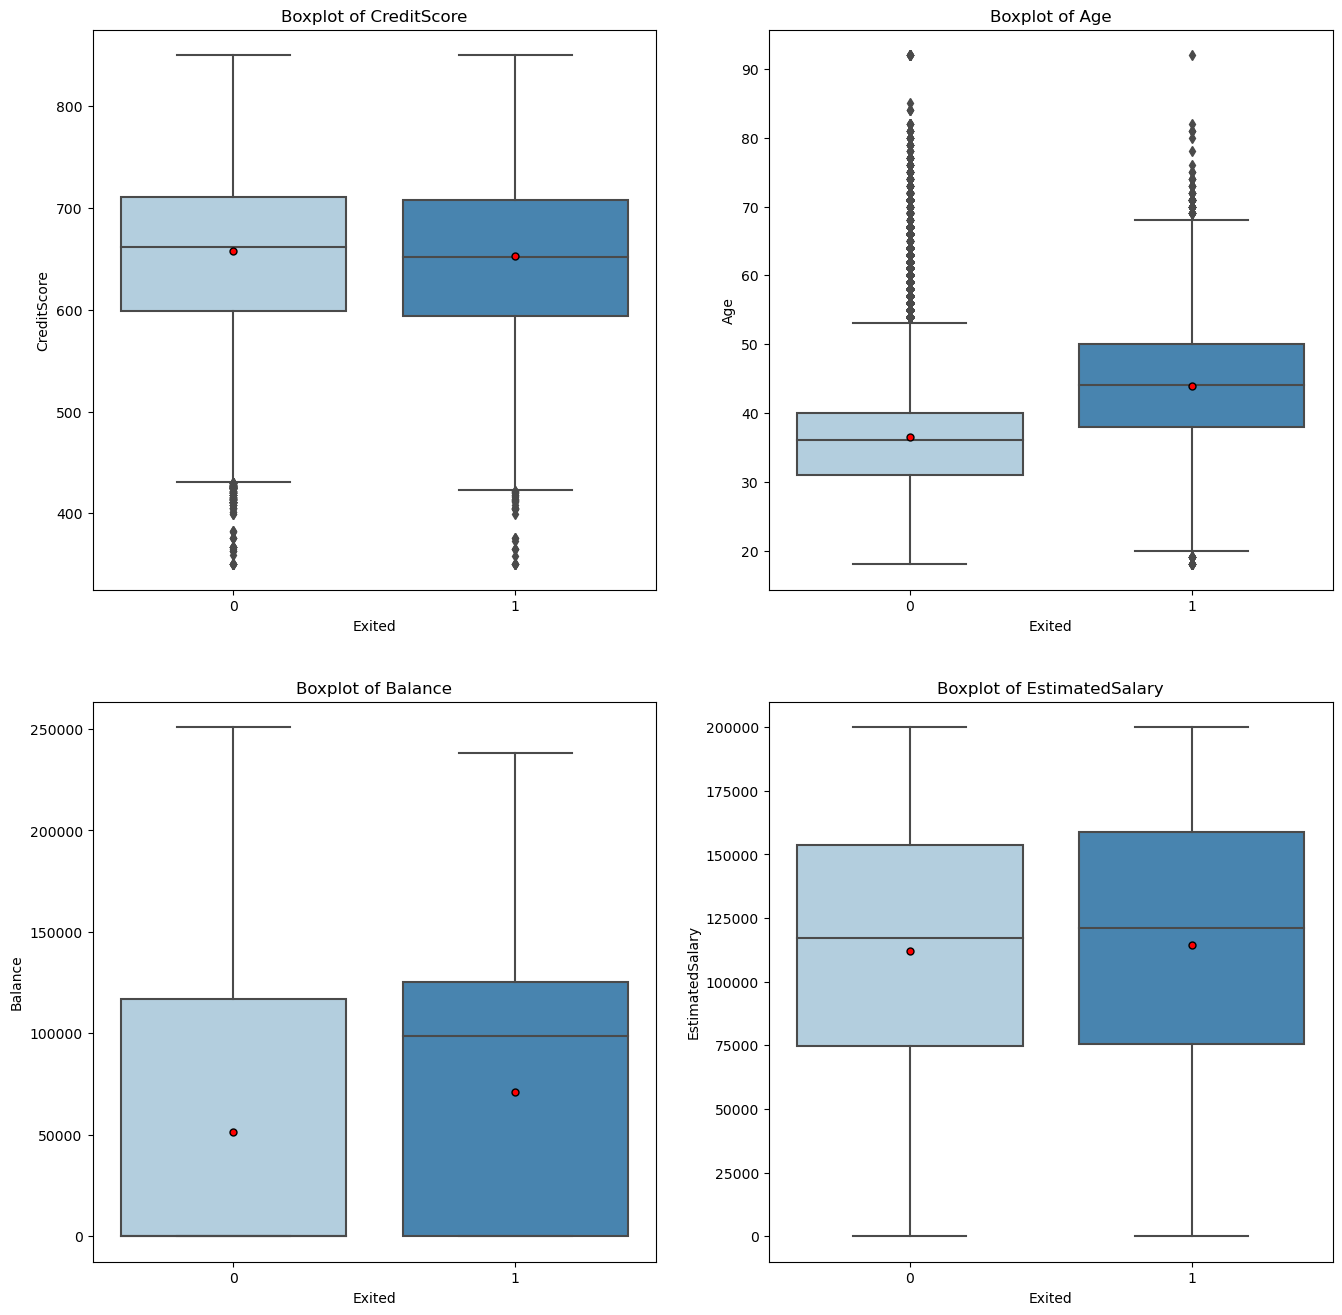

In [113]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,16))

for i,ax in enumerate(axes.ravel()):
    sns.boxplot(x='Exited',
                y=quants[i],
                data=df,
                showmeans=True,
                meanprops={"marker": "o", "markerfacecolor": 'red',"markeredgecolor": "black","markersize": "5"},
                palette="Blues",
                ax=ax)
    ax.set_title(f"Boxplot of {(quants[i])}")
    
    
plt.show()

In [114]:
### Cats and Target

In [115]:
cats_2=cats

In [116]:
def disp_plots(cats_2):
    combos=[[a,b] for idx, a in enumerate(cats_2) for b in tl[idx + 1:]]
    for combo in combos:
        sns.countplot(data=df,x=combo[0],hue=combo[1])
        plt.show()

In [117]:
cats_2=['Geography','Gender','Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember']

## Categoricals and Target

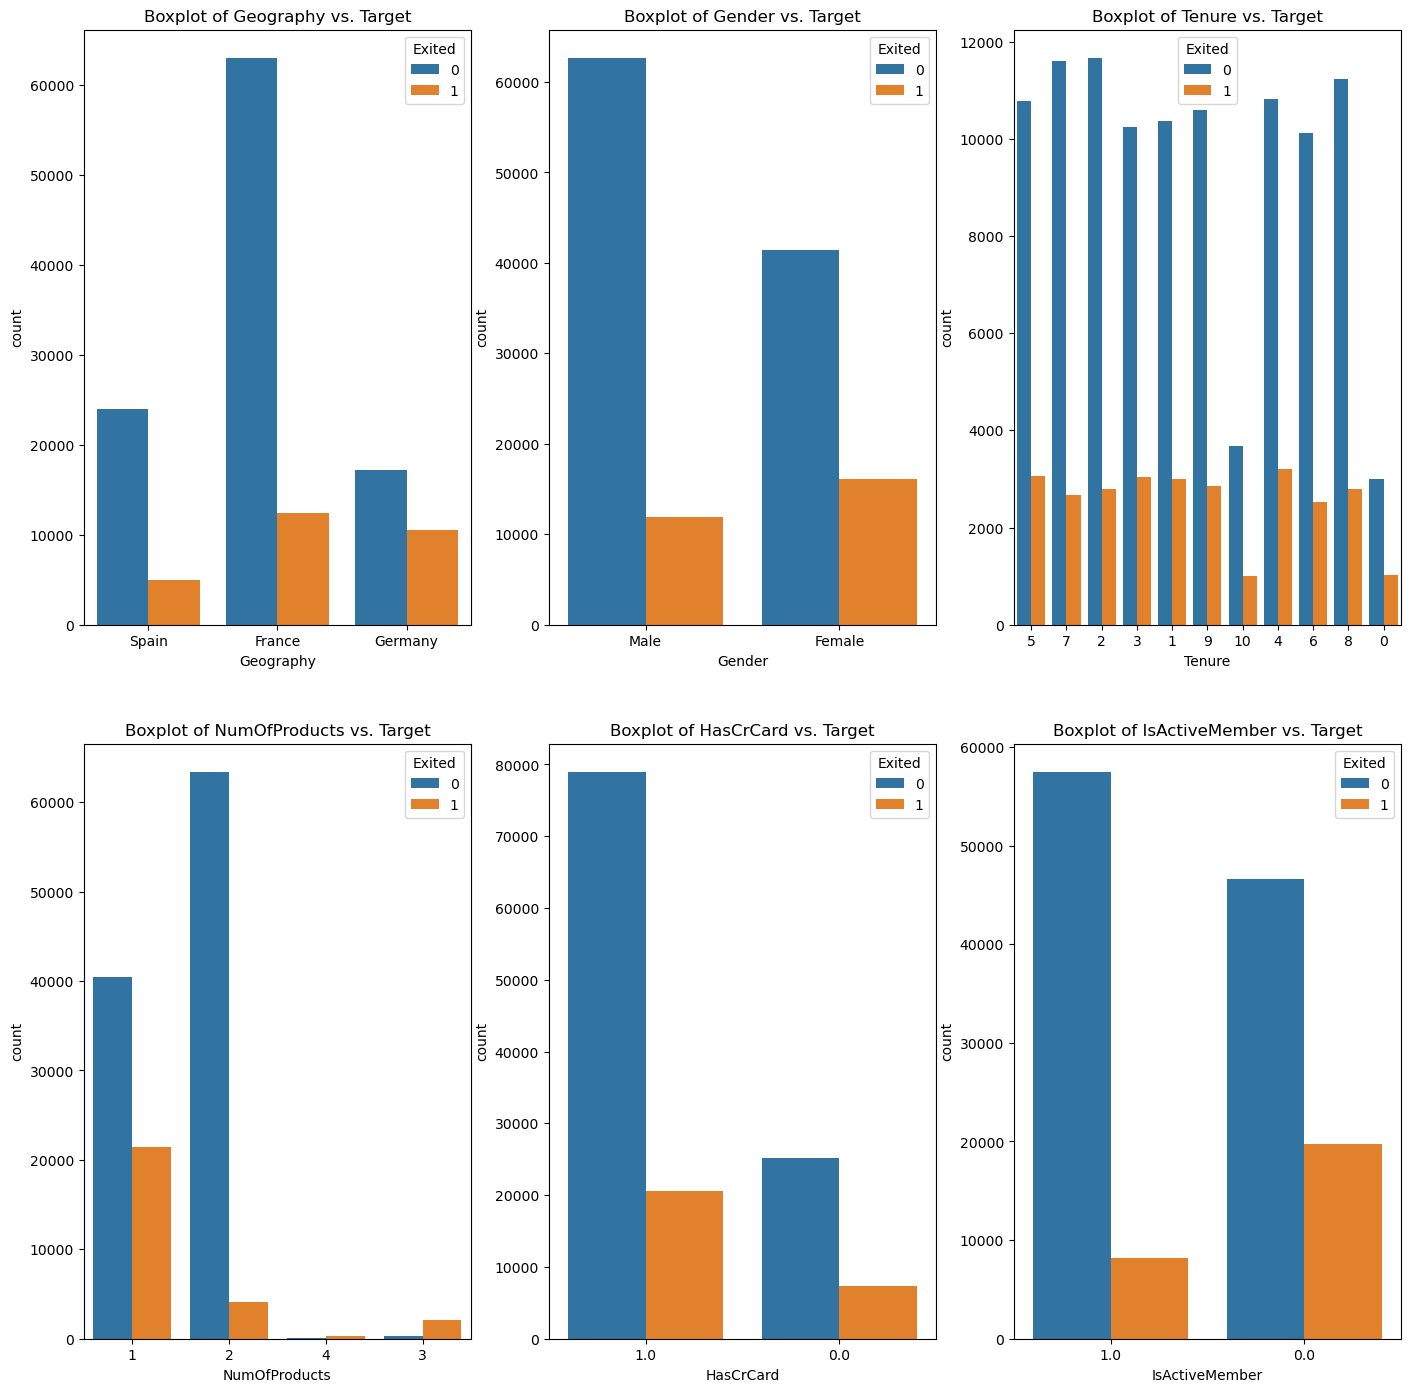

In [118]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(17,17))

for i,ax in enumerate(axes.ravel()):
    sns.countplot(data=df,x=cats_2[i],hue="Exited",ax=ax)
    ax.set_title(f"Boxplot of {(cats_2[i])} vs. Target")

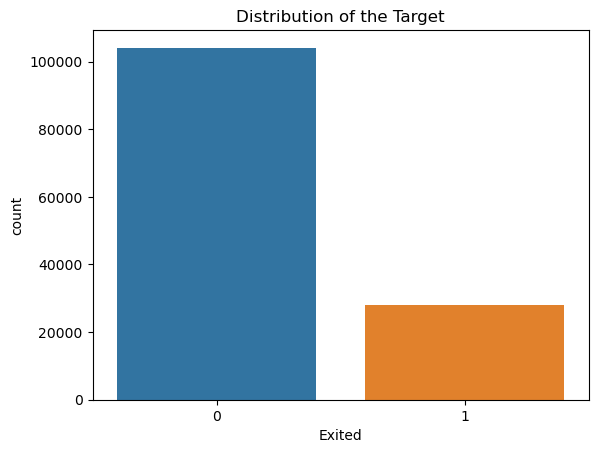

In [119]:
sns.countplot(data=df,x="Exited")
plt.title("Distribution of the Target")
plt.show()

## Preprocessing before

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132027 entries, 37560 to 38408
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      132027 non-null  int64  
 1   Geography        132027 non-null  object 
 2   Gender           132027 non-null  object 
 3   Age              132027 non-null  float64
 4   Tenure           132027 non-null  object 
 5   Balance          132027 non-null  float64
 6   NumOfProducts    132027 non-null  object 
 7   HasCrCard        132027 non-null  object 
 8   IsActiveMember   132027 non-null  object 
 9   EstimatedSalary  132027 non-null  float64
 10  Exited           132027 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 16.1+ MB


In [121]:
def cols_to_float(dt):
    dt['Tenure']=dt['Tenure'].astype(float)
    dt['NumOfProducts']=dt['NumOfProducts'].astype(float)
    dt['HasCrCard']=df['HasCrCard'].astype(float)
    dt['IsActiveMember']=dt['IsActiveMember'].astype(float)
    dt['IsActiveMember']=dt['IsActiveMember'].astype(float)
    dt['Exited']=dt['Exited'].astype(float)
    
    return dt

df=cols_to_float(df)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132027 entries, 37560 to 38408
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      132027 non-null  int64  
 1   Geography        132027 non-null  object 
 2   Gender           132027 non-null  object 
 3   Age              132027 non-null  float64
 4   Tenure           132027 non-null  float64
 5   Balance          132027 non-null  float64
 6   NumOfProducts    132027 non-null  float64
 7   HasCrCard        132027 non-null  float64
 8   IsActiveMember   132027 non-null  float64
 9   EstimatedSalary  132027 non-null  float64
 10  Exited           132027 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 16.1+ MB


In [123]:
#OneHotEncoding rest of the data

In [124]:

def col_to_dummies_and_float(dt):
    dt=pd.get_dummies(dt, columns = ['Geography', 'Gender'])

    dt['Geography_France']=dt['Geography_France'].astype(float)
    dt['Geography_Germany']=dt['Geography_Germany'].astype(float)
    dt['Geography_Spain']=dt['Geography_Spain'].astype(float)
    dt['Gender_Female']=dt['Gender_Female'].astype(float)
    dt['Gender_Male']=dt['Gender_Male'].astype(float)
    dt['Exited']=dt['Exited'].astype(float)
    
    return dt 

df=col_to_dummies_and_float(df)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132027 entries, 37560 to 38408
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        132027 non-null  int64  
 1   Age                132027 non-null  float64
 2   Tenure             132027 non-null  float64
 3   Balance            132027 non-null  float64
 4   NumOfProducts      132027 non-null  float64
 5   HasCrCard          132027 non-null  float64
 6   IsActiveMember     132027 non-null  float64
 7   EstimatedSalary    132027 non-null  float64
 8   Exited             132027 non-null  float64
 9   Geography_France   132027 non-null  float64
 10  Geography_Germany  132027 non-null  float64
 11  Geography_Spain    132027 non-null  float64
 12  Gender_Female      132027 non-null  float64
 13  Gender_Male        132027 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 19.1 MB


In [126]:
y=df['Exited']
x=df.drop(columns='Exited',axis=1)

In [127]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,,
37560,597,33.0,5.0,0.00,1.0,1.0,1.0,182076.97,0.0,0.0,1.0,0.0,1.0
29491,607,41.0,5.0,0.00,1.0,1.0,0.0,170903.40,0.0,0.0,1.0,0.0,1.0
115988,554,37.0,7.0,51582.50,1.0,0.0,1.0,184312.88,1.0,0.0,0.0,1.0,0.0
73686,792,30.0,2.0,0.00,2.0,1.0,1.0,92915.83,0.0,0.0,1.0,0.0,1.0
156662,505,41.0,3.0,145541.56,2.0,1.0,1.0,58019.95,0.0,1.0,0.0,0.0,1.0


In [128]:
### Initial Variable Importance Checker

In [129]:
# Modelling
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

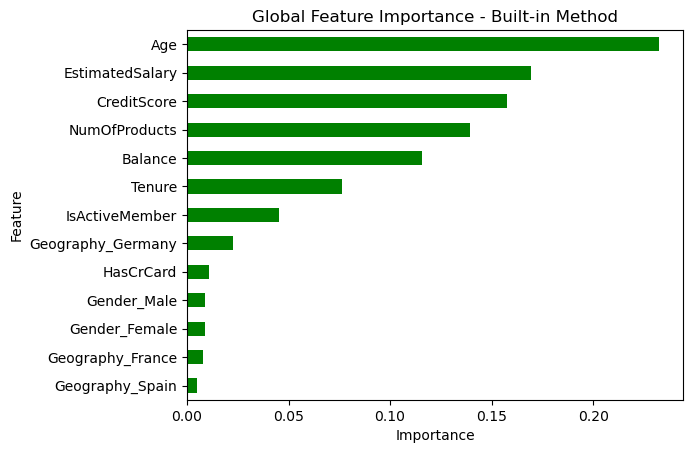

In [130]:
rc = RandomForestClassifier(n_estimators=100, random_state=42)
rc.fit(x, y)

global_importances = pd.Series(rc.feature_importances_, index=x.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

# Advanced Modelling

## Encoding Caegoricals

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132027 entries, 37560 to 38408
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        132027 non-null  int64  
 1   Age                132027 non-null  float64
 2   Tenure             132027 non-null  float64
 3   Balance            132027 non-null  float64
 4   NumOfProducts      132027 non-null  float64
 5   HasCrCard          132027 non-null  float64
 6   IsActiveMember     132027 non-null  float64
 7   EstimatedSalary    132027 non-null  float64
 8   Exited             132027 non-null  float64
 9   Geography_France   132027 non-null  float64
 10  Geography_Germany  132027 non-null  float64
 11  Geography_Spain    132027 non-null  float64
 12  Gender_Female      132027 non-null  float64
 13  Gender_Male        132027 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 19.1 MB


In [132]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [141]:
quants=['CreditScore','Age','Balance','EstimatedSalary']
nominal=['Geography','Gender']
ordinal=['Tenure','NumOfProducts']
others=['HasCrCard','IsActiveMember']

df = x_train

In [146]:
list(np.arange(0,11,dtype=float))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [147]:
numeric_transformer = StandardScaler()

encoder_tenure=OrdinalEncoder(categories=[list(np.arange(0,11,dtype=float))])
encoder_numofproducts=OrdinalEncoder(categories=[list(np.arange(1,5,dtype=float))])
nominal_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,quants),
    ('ten',encoder_tenure,['Tenure']),
    ('prods',encoder_numofproducts,['NumOfProducts']),
    ('nomi',nominal_transformer,nominal)
])

In [148]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=100)

log_reg_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',logreg)
])

log_reg_model=log_reg_pipeline.fit(x_train,y_train)

In [150]:
y_pred = log_reg_model.predict(x_test)

Text(0.5, 427.9555555555555, 'Predicted label')

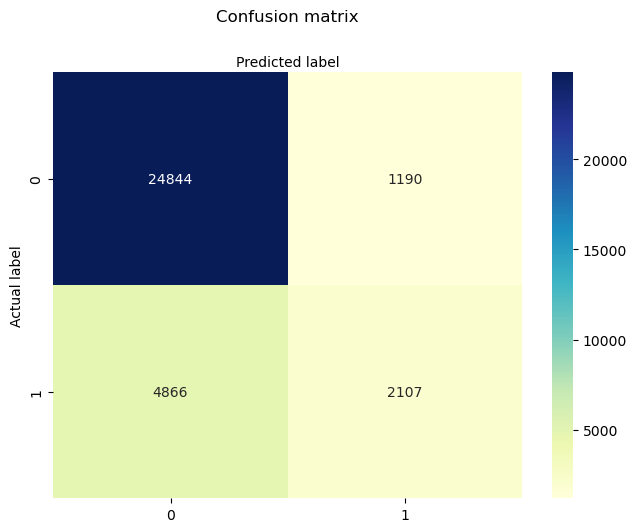

In [153]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

